<a href="https://colab.research.google.com/github/complex224aayush/explaination__all/blob/main/Building_Model_Architectures_Alexnet_Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up Directories

In [ ]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:04<00:00, 231MB/s]
100% 1.06G/1.06G [00:04<00:00, 245MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

# Installing the required libraries

In [ ]:
!pip3 install tensorflow numpy matplotlib keras

# Importing Packages

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Setting up Path

In [ ]:
# Placeholder for the directory path
cat_directory_path = '/content/dogs_vs_cats/train/cats'
dog_directory_path = '/content/dogs_vs_cats/train/dogs'

# Initialising the Generator

# Follow this if you have seperate folders -

train_dir = ''
validation_dir = ''
image_size = (224, 224)
batch_size = 100

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Generate data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'

)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'

)

In [ ]:

# Set path to the dataset
data_dir = '/content/dogs_vs_cats/train'

# Hyperparameters
img_width, img_height = 224, 224  # AlexNet input size
batch_size = 32
epochs = 5
validation_split = 0.2  # 20% of data for validation

In [ ]:
# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="training",
    seed=123,
    image_size=(img_width, img_height),
    batch_size=batch_size
)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=123,
    image_size=(img_width, img_height),
    batch_size=batch_size
)

Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


In [ ]:
# Data Augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

In [ ]:
# Apply data augmentation only on the training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

32 images - Pass to model trainign.
load next batch of 32 images and - Pass to model traing.

In [ ]:
# Prefetch the datasets for performance
AUTOTUNE = tf.data.AUTOTUNE # Performance of resrouces
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

Before diving into the specifics of AUTOTUNE, it's important to understand the role of data pipelines:

Data Loading: The process of reading data from storage (e.g., disk).
Preprocessing: Operations like resizing, normalization, augmentation, etc., that are applied to the data before feeding it to the model.
Batching: Grouping individual examples into batches for efficient processing.
Prefetching: Loading the next batch of data while the current one is being processed by the model, to ensure that the GPU/CPU is always busy.
A well-optimized data pipeline ensures that the model training process is not waiting for data, which would slow down the training.

# Building Alexnet Model

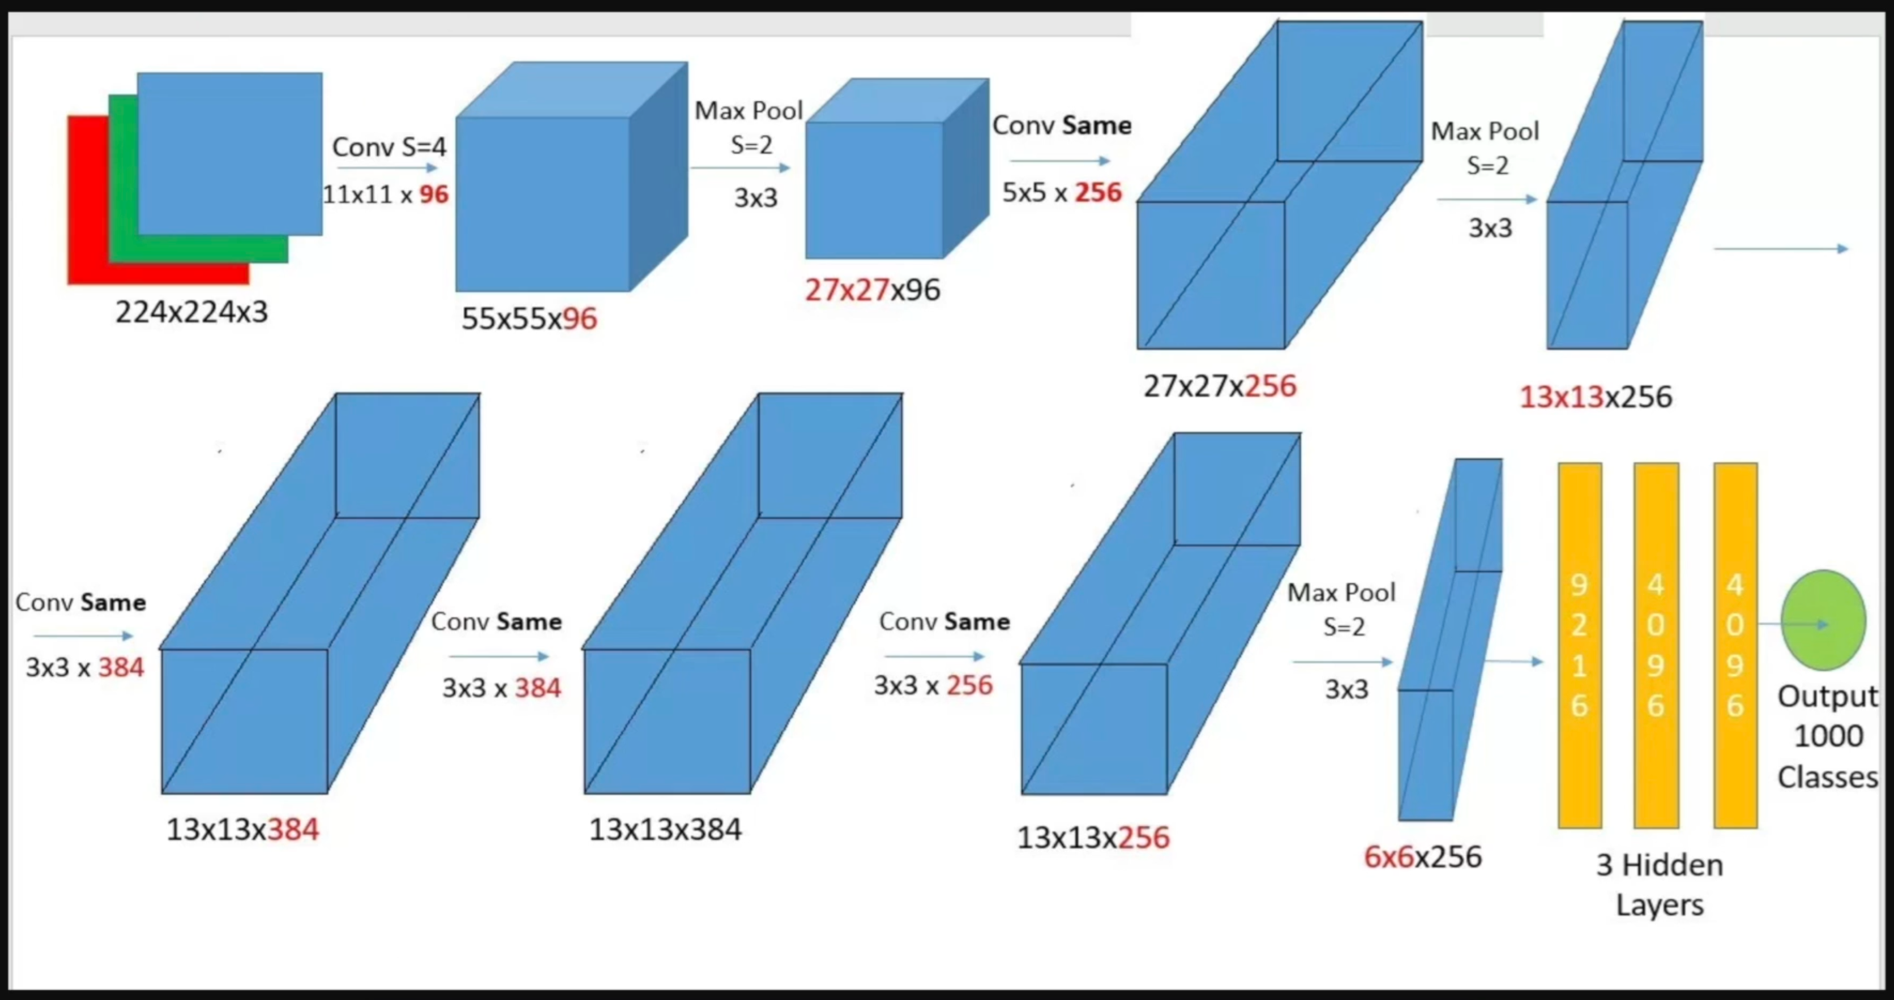

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# AlexNet model
alexnet_model = Sequential([
    Input(shape=(224, 224, 3)),

    Conv2D(96, (11, 11), strides=(4, 4), activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),

    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),

    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),

    MaxPooling2D((3, 3), strides=(2, 2)),

    Flatten(),

    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

In [ ]:
alexnet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,751,105 (178.34 MB)

 Trainable params: 46,751,105 (178.34 MB)

 Non-trainable params: 0 (0.00 B)

# Model Compile

In [ ]:
# Compile the model
alexnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training

In [ ]:
history = alexnet_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=1
)

500/500 ━━━━━━━━━━━━━━━━━━━━ 218s 417ms/step - accuracy: 0.5031 - loss: 7.5805 - val_accuracy: 0.4915 - val_loss: 0.6939


In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = alexnet_model.evaluate(validation_dataset)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.4918 - loss: 0.6935
Validation Accuracy: 49.15%


In [ ]:
alexnet_model.save("saved_model_1_epochs.keras")

In [ ]:
alexnet_model.save_weights("model_1.weights.h5")

In [ ]:
# Load the model
loaded_model_1 = load_model('model_1.weights.h5')

ValueError: No model config found in the file at model_1.weights.h5.

### Model save_weights?

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('saved_model_1_epochs.keras')

# Now you can use the loaded model for inference or further training


In [ ]:
loaded_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,253,317 (535.02 MB)

 Trainable params: 46,751,105 (178.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,502,212 (356.68 MB)

In [ ]:
history = loaded_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=2
)

Epoch 1/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 208s 408ms/step - accuracy: 0.4953 - loss: 0.6936 - val_accuracy: 0.4915 - val_loss: 0.6941
Epoch 2/2
500/500 ━━━━━━━━━━━━━━━━━━━━ 221s 441ms/step - accuracy: 0.4928 - loss: 0.6936 - val_accuracy: 0.4915 - val_loss: 0.6937


In [ ]:
history_dict=history.history
history_dict

{'accuracy': [0.4924375116825104, 0.5017499923706055],
 'loss': [0.69343501329422, 0.6932709813117981],
 'val_accuracy': [0.49149999022483826, 0.49149999022483826],
 'val_loss': [0.6935741901397705, 0.6935277581214905]}

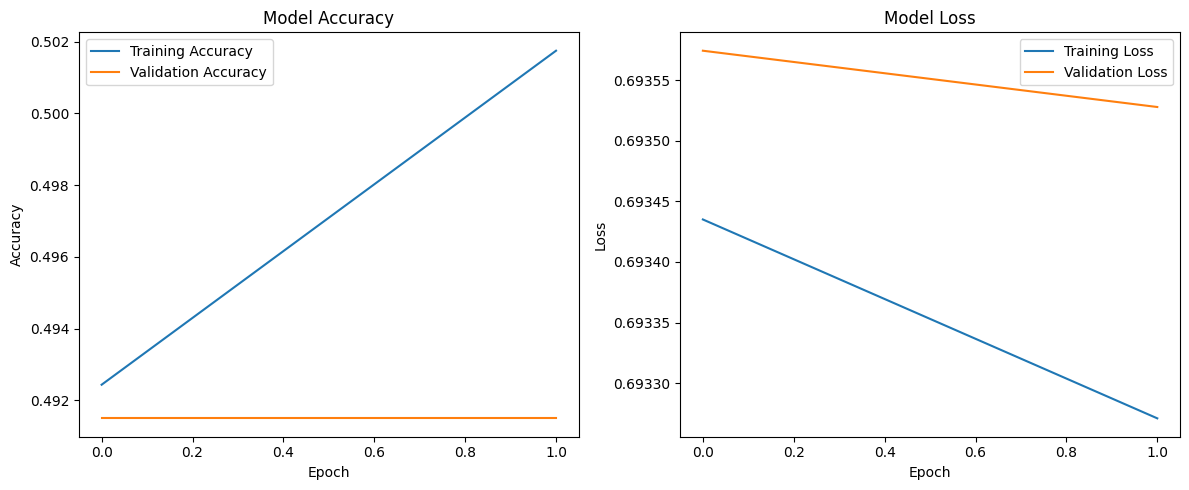

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a `history` object returned from model.fit()
history_dict = history.history  # Access the history dictionary

# Plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


# Building Lenet Model

In [ ]:
# LeNet model
lenet_model = Sequential([
    Conv2D(32, (5, 5), activation='tanh', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), activation='tanh'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='tanh'),
    Dense(1, activation='sigmoid')
])